# MLUL2 - Group Assignment  
## Group - 6

__1. 12120011 - Harsimar Singh Arora  
2. 12120027 - Rohini Purnima  
3. 12120035 - Mohit Kothari  
4. 12120040 - Rohit Thakur  
5. 12120097 - Unnati Khinvasara__  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

Let's checkout the Books dataset, which will be a master dataset in our usecase. This dataset has all the details of the books, for which we will be performing item to item collaborative filtering.

In [2]:
books_dataset = pd.read_csv("C:\\Users\\harsi\\OneDrive - Indian School of Business\\AMPBA\\Term3\\MLUL2\\GroupAssignment\\Books.csv", sep=',', encoding='latin-1', on_bad_lines='skip', low_memory=False)
print(books_dataset.shape)
books_dataset.head(10)

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


Let's checkout the Ratings dataset, which contains User IDs and the ratings those users have given to different books. This information will be main feature for finding the similarity between the books.

In [3]:
book_ratings_dataset = pd.read_csv("C:\\Users\\harsi\\OneDrive - Indian School of Business\\AMPBA\\Term3\\MLUL2\\GroupAssignment\\Ratings.csv", sep=',', encoding='latin-1', on_bad_lines='skip', low_memory=False)
print(book_ratings_dataset.shape)
book_ratings_dataset.head(10)

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


Let's checkout the unique authors and books in Books.csv dataset and users in Ratings.csv dataset.

In [4]:
unique_books = len(books_dataset['Book-Title'].unique())
unique_authors = len(books_dataset['Book-Author'].unique())
print('The Unqiue books in the dataset are - ' + str(unique_books))
print('The Unqiue authors in the dataset are - ' + str(unique_authors))

The Unqiue books in the dataset are - 242135
The Unqiue authors in the dataset are - 102024


In [5]:
unique_users = len(book_ratings_dataset['User-ID'].unique())
print('The Unqiue users in the Ratings dataset are - ' + str(unique_users))

The Unqiue users in the Ratings dataset are - 105283


Let's checkout the distribution of the ratings.

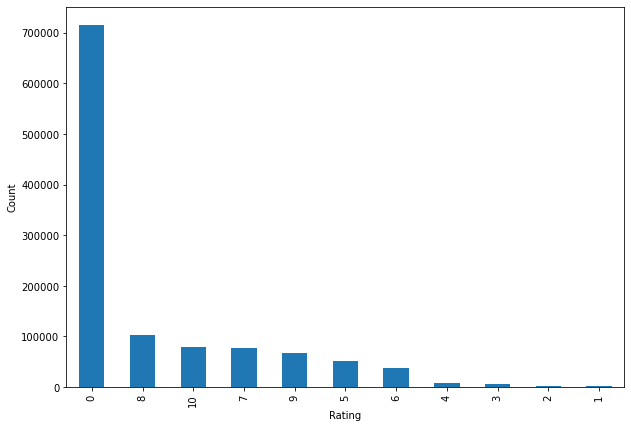

In [6]:
plt.figure(figsize=(10,7))
book_ratings_dataset['Book-Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Merging the books and ratings datasets, so that we can perform recommendations on the same.

In [7]:
books_dataset_required_features = ['ISBN','Book-Title','Book-Author','Year-Of-Publication','Book-Rating','User-ID']
books_ratings_merged = pd.merge(left=book_ratings_dataset, right=books_dataset, on='ISBN')[books_dataset_required_features]
books_ratings_merged.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Rating,User-ID
0,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,276725
1,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,5,2313
2,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,6543
3,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,5,8680
4,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,9,10314
5,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,23768
6,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,28266
7,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,28523
8,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,39002
9,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,9,50403


Now, let's find the users which have rated more than 100 books. We will be using these as the columns of the recommender dataset with ratings being filled. These readers/users can be used as good readers.

In [8]:
good_readers = pd.DataFrame(books_ratings_merged['User-ID'].value_counts())[(books_ratings_merged['User-ID'].value_counts() > 100).values].index.values
good_readers = list(good_readers)
print('The number of Top Readers in our dataset are - ' + str(len(good_readers)))
print('The sample from Top Readers is - ')
good_readers[0:15]

The number of Top Readers in our dataset are - 1648
The sample from Top Readers is - 


[11676,
 198711,
 153662,
 98391,
 35859,
 212898,
 278418,
 76352,
 110973,
 235105,
 16795,
 230522,
 234623,
 204864,
 36836]

Now, let's find the books which have been rated more than 35 times. We will be using these books as the rows of the recommender dataset. We will represent these books as good books.

In [9]:
good_books = books_ratings_merged.groupby(by='Book-Title').count()[['Book-Rating']].reset_index()
good_books = good_books.loc[good_books['Book-Rating'] > 35]['Book-Title'].values
good_books = list(good_books)
print('The number of Top Rated Books in our dataset are - ' + str(len(good_books)))
print('The sample from Top Rated Books is - ')
good_books[0:15]

The number of Top Rated Books in our dataset are - 3679
The sample from Top Rated Books is - 


["'Salem's Lot",
 '10 Lb. Penalty',
 '101 Dalmatians',
 '16 Lighthouse Road',
 '1984',
 '1st to Die: A Novel',
 '2010: Odyssey Two',
 '204 Rosewood Lane',
 '2061: Odyssey Three',
 '24 Hours',
 '2nd Chance',
 '3001: The Final Odyssey',
 '311 Pelican Court',
 '3rd Degree',
 '4 Blondes']

In [10]:
recommendation_dataset = books_ratings_merged[books_ratings_merged['Book-Title'].isin(values=good_books)]
recommendation_dataset = recommendation_dataset[recommendation_dataset['User-ID'].isin(values=good_readers)]
recommendation_dataset.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Rating,User-ID
2,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,6543
4,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,9,10314
5,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,23768
7,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,28523
14,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,8,77480
15,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,77940
16,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,81977
18,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,9,98391
20,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,5,115435
21,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,0,123981


In [11]:
recommendation_dataset.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Book-Rating            0
User-ID                0
dtype: int64

In [12]:
recommendation_dataset_ratings = pd.pivot_table(data=recommendation_dataset,values='Book-Rating',index='Book-Title',columns='User-ID',fill_value=0)
recommendation_dataset_ratings

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
10 Lb. Penalty,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
101 Dalmatians,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
16 Lighthouse Road,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1984,9.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoya,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
"\O\"" Is for Outlaw""",0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


Now, we have the recommend dataset based on ratings. Let's build a model for item to item collaberative filtering using cosine similarity for recommendation systems.

In [13]:
recommendation_ratings_similarity = cosine_similarity(X=recommendation_dataset_ratings)
print(recommendation_ratings_similarity.shape)
recommendation_ratings_similarity

(3679, 3679)


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.17276294],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.17276294, 0.        ,
        1.        ]])

We can understand the above scores as the closeness between the different books based on ratings, please refer to the below table for more details - 

In [14]:
similarity_score_table = pd.DataFrame(recommendation_ratings_similarity)
similarity_score_table.index = list(recommendation_dataset_ratings.index)
similarity_score_table.columns = list(recommendation_dataset_ratings.index)
similarity_score_table.head(10)

,'Salem's Lot,10 Lb. Penalty,101 Dalmatians,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,...,Your Oasis on Flame Lake (Ballantine Reader's Circle),Zen and the Art of Motorcycle Maintenance,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zlata's Diary: A Child's Life in Sarajevo,Zodiac: The Eco-Thriller,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,stardust
'Salem's Lot,1.000000,0.000000,0.000000,0.000000,0.000000,0.044352,0.228999,0.000000,0.152986,0.000000,...,0.000000,0.0,0.000000,0.134189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10 Lb. Penalty,0.000000,1.000000,0.000000,0.000000,0.000000,0.113639,0.000000,0.000000,0.049469,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.041831,0.000000,0.000000,0.000000
101 Dalmatians,0.000000,0.000000,1.000000,0.000000,0.058012,0.000000,0.000000,0.000000,0.052386,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.156255,0.000000,0.000000,0.000000
16 Lighthouse Road,0.000000,0.000000,0.000000,1.000000,0.000000,0.038271,0.150349,0.126646,0.000000,0.000000,...,0.000000,0.0,0.105685,0.000000,0.000000,0.000000,0.067831,0.000000,0.000000,0.000000
1984,0.000000,0.000000,0.058012,0.000000,1.000000,0.065508,0.093177,0.000000,0.000000,0.009722,...,0.000000,0.0,0.075478,0.000000,0.140778,0.058108,0.030294,0.015602,0.072165,0.091209
1st to Die: A Novel,0.044352,0.113639,0.000000,0.038271,0.065508,1.000000,0.022477,0.000000,0.000000,0.072029,...,0.109271,0.0,0.047399,0.075733,0.095829,0.135487,0.123883,0.035566,0.048742,0.062011
2010: Odyssey Two,0.228999,0.000000,0.000000,0.150349,0.093177,0.022477,1.000000,0.000000,0.273221,0.000000,...,0.000000,0.0,0.093103,0.000000,0.052530,0.000000,0.000000,0.000000,0.071807,0.000000
204 Rosewood Lane,0.000000,0.000000,0.000000,0.126646,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2061: Odyssey Three,0.152986,0.049469,0.052386,0.000000,0.000000,0.000000,0.273221,0.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24 Hours,0.000000,0.000000,0.000000,0.000000,0.009722,0.072029,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.028561,0.000000,0.069061,0.049730,0.012221,0.040821,0.000000,0.050239


Now, let's build a recommendation system function in which we will give a book as a input and we will get the recommended books as output based on ratings.  
### Recommendation model based on ratings - 

In [15]:
def RecommendBooksBasedOnRatings(BookName):
    recommended_books = list(similarity_score_table.loc[:,[BookName]]
                             .drop(BookName).sort_values(BookName,ascending=False).reset_index().loc[0:4,'index'])
    return recommended_books

In [16]:
BookName = "Miss Smilla's Feeling for Snow"
ratings_recommendations = RecommendBooksBasedOnRatings(BookName)
print('The recommended books for ' + BookName + ' are - ')
print('\n')
for book in ratings_recommendations:
        print(book)

The recommended books for Miss Smilla's Feeling for Snow are - 


Jane Eyre (Wordsworth Classics)
Breath of Scandal
John Adams
MÃ?ÃÂ¶rder ohne Gesicht.
Garden of Rama


In [17]:
BookName = "stardust"
ratings_recommendations = RecommendBooksBasedOnRatings(BookName)
print('The recommended books for ' + BookName + ' are - ')
print('\n')
for book in ratings_recommendations:
        print(book)

The recommended books for stardust are - 


Jane Eyre (Wordsworth Classics)
Miss Smilla's Feeling for Snow
The Giant's House : A Romance
Gai-Jin: A Novel of Japan
Dreaming in Cuban


In [18]:
BookName = "16 Lighthouse Road"
ratings_recommendations = RecommendBooksBasedOnRatings(BookName)
print('The recommended books for ' + BookName + ' are - ')
print('\n')
for book in ratings_recommendations:
        print(book)

The recommended books for 16 Lighthouse Road are - 


Hurricane Bay
Imitation in Death (Eve Dallas Mysteries (Paperback))
The Morning After
Tapestry
A Kiss to Remember


We can also include the recommendation based on year as well.

In [19]:
recommendation_dataset_year = pd.pivot_table(data=recommendation_dataset,values='Year-Of-Publication',index='Book-Title',columns='User-ID',fill_value=0)
recommendation_dataset_year

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
10 Lb. Penalty,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
101 Dalmatians,0.0,1996,0,0,0,0,0.0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,0,0.0,1996.0
16 Lighthouse Road,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,0,2001.0,0.0
1984,1990.0,0,0,0,0,0,0.0,0,0,0,...,0,1990.0,0.0,0.0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoya,0.0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0,0,0,0,0,0.0,2001,0,0,...,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0,0,0,0,0,0.0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0


In [20]:
recommendation_year_similarity = cosine_similarity(X=recommendation_dataset_year)
print(recommendation_year_similarity.shape)
recommendation_year_similarity

(3679, 3679)


array([[1.00000000e+00, 1.20357614e-01, 1.47444230e-01, ...,
        0.00000000e+00, 4.65956686e-02, 4.34506850e-02],
       [1.20357614e-01, 1.00000000e+00, 4.08350240e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.47444230e-01, 4.08350240e-01, 1.00000000e+00, ...,
        2.72737221e-05, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.72737221e-05, ...,
        1.00000000e+00, 4.29659110e-02, 1.60404610e-01],
       [4.65956686e-02, 0.00000000e+00, 0.00000000e+00, ...,
        4.29659110e-02, 1.00000000e+00, 4.66252404e-02],
       [4.34506850e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.60404610e-01, 4.66252404e-02, 1.00000000e+00]])

In [21]:
similarity_score_year_table = pd.DataFrame(recommendation_year_similarity)
similarity_score_year_table.index = list(recommendation_dataset_year.index)
similarity_score_year_table.columns = list(recommendation_dataset_year.index)
similarity_score_year_table

,'Salem's Lot,10 Lb. Penalty,101 Dalmatians,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,...,Your Oasis on Flame Lake (Ballantine Reader's Circle),Zen and the Art of Motorcycle Maintenance,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zlata's Diary: A Child's Life in Sarajevo,Zodiac: The Eco-Thriller,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,stardust
'Salem's Lot,1.000000e+00,0.120358,1.474442e-01,0.031415,1.250169e-08,0.066088,2.501590e-04,0.000000,5.888896e-05,8.332363e-05,...,0.000000,0.000000,8.844451e-05,3.294687e-02,0.000000,0.000167,0.000047,0.000000,4.659567e-02,0.043451
10 Lb. Penalty,1.203576e-01,1.000000,4.083502e-01,0.087056,0.000000e+00,0.000037,1.155046e-04,0.000016,8.162873e-05,4.619031e-08,...,0.000000,0.000000,8.169035e-05,0.000000e+00,0.000000,0.000116,0.000087,0.000000,0.000000e+00,0.000000
101 Dalmatians,1.474442e-01,0.408350,1.000000e+00,0.106648,2.120997e-08,0.000134,5.655718e-08,0.000000,9.978892e-05,5.655718e-08,...,0.141386,0.000050,3.998192e-08,2.235200e-05,0.000000,0.000283,0.000054,0.000027,0.000000e+00,0.000000
16 Lighthouse Road,3.141479e-02,0.087056,1.066483e-01,1.000000,1.507557e-01,0.047778,9.041388e-05,0.490362,0.000000e+00,1.509062e-01,...,0.120605,0.000000,1.065895e-04,0.000000e+00,0.069210,0.000241,0.057037,0.028968,6.741999e-02,0.031435
1984,1.250169e-08,0.000000,2.120997e-08,0.150756,1.000000e+00,0.316228,1.998383e-04,0.141421,2.118428e-08,9.999990e-01,...,0.200000,0.000000,1.414282e-04,1.422830e-08,0.229543,0.000200,0.377964,0.192149,2.676273e-08,0.208514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoya,1.667517e-04,0.000116,2.828843e-04,0.000241,1.999798e-04,0.000190,2.003794e-04,0.000141,1.130289e-07,2.002995e-04,...,0.000120,0.000071,8.506366e-08,3.161838e-05,0.000092,1.000000,0.000076,0.000077,4.471683e-05,0.000167
"\O\"" Is for Outlaw""",4.735479e-05,0.000087,5.350823e-05,0.057037,3.779643e-01,0.239165,1.511699e-04,0.053506,2.136047e-08,3.779642e-01,...,0.151216,0.133667,1.604152e-04,1.194884e-01,0.086794,0.000076,1.000000,0.072640,5.070417e-05,0.078827
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.000000e+00,0.000000,2.727372e-05,0.028968,1.921494e-01,0.060812,1.538004e-04,0.027174,2.726954e-01,1.922646e-01,...,0.038430,0.000000,1.361431e-04,3.038034e-02,0.088368,0.000077,0.072640,1.000000,4.296591e-02,0.160405
e,4.659567e-02,0.000000,0.000000e+00,0.067420,2.676273e-08,0.000071,2.235842e-04,0.063246,3.154812e-05,4.471685e-05,...,0.089443,0.000000,1.267333e-04,3.535401e-02,0.051147,0.000045,0.000051,0.042966,1.000000e+00,0.046625


In [22]:
def RecommendBooksBasedOnYear(BookName):
    recommended_books = list(similarity_score_year_table.loc[:,[BookName]]
                             .drop(BookName).sort_values(BookName,ascending=False).reset_index().loc[0:4,'index'])
    return recommended_books

Now, we have two recommendation systems - 
1. Based on Ratings.
2. Based on Published Year.

In [23]:
BookName = "Miss Smilla's Feeling for Snow"
ratings_recommendations = RecommendBooksBasedOnRatings(BookName)
year_recommendations = RecommendBooksBasedOnYear(BookName)
print('The recommended books for ' + BookName + ' based on Ratings are - ')
print('\n')
for book in ratings_recommendations:
    print(book)
print('\n')
print('The recommended books for ' + BookName + ' based on Published Year are - ')
print('\n')
for book in year_recommendations:
    print(book)

The recommended books for Miss Smilla's Feeling for Snow based on Ratings are - 


Jane Eyre (Wordsworth Classics)
Breath of Scandal
John Adams
MÃ?ÃÂ¶rder ohne Gesicht.
Garden of Rama


The recommended books for Miss Smilla's Feeling for Snow based on Published Year are - 


Red Storm Rising
The Horse Whisperer
Slow Waltz in Cedar Bend
The Piano Tuner
House Corrino (Dune: House Trilogy, Book 3)


In [24]:
BookName = "stardust"
ratings_recommendations = RecommendBooksBasedOnRatings(BookName)
year_recommendations = RecommendBooksBasedOnYear(BookName)
print('The recommended books for ' + BookName + ' based on Ratings are - ')
print('\n')
for book in ratings_recommendations:
    print(book)
print('\n')
print('The recommended books for ' + BookName + ' based on Published Year are - ')
print('\n')
for book in year_recommendations:
    print(book)

The recommended books for stardust based on Ratings are - 


Jane Eyre (Wordsworth Classics)
Miss Smilla's Feeling for Snow
The Giant's House : A Romance
Gai-Jin: A Novel of Japan
Dreaming in Cuban


The recommended books for stardust based on Published Year are - 


Half Asleep in Frog Pajamas
Fierce Invalids Home from Hot Climates
Lullaby: A Novel
The Hitchhiker's Guide to the Galaxy
Where the Red Fern Grows


In [25]:
BookName = "16 Lighthouse Road"
ratings_recommendations = RecommendBooksBasedOnRatings(BookName)
year_recommendations = RecommendBooksBasedOnYear(BookName)
print('The recommended books for ' + BookName + ' based on Ratings are - ')
print('\n')
for book in ratings_recommendations:
    print(book)
print('\n')
print('The recommended books for ' + BookName + ' based on Published Year are - ')
print('\n')
for book in year_recommendations:
    print(book)

The recommended books for 16 Lighthouse Road based on Ratings are - 


Hurricane Bay
Imitation in Death (Eve Dallas Mysteries (Paperback))
The Morning After
Tapestry
A Kiss to Remember


The recommended books for 16 Lighthouse Road based on Published Year are - 


204 Rosewood Lane
311 Pelican Court
The Perfect Summer
Dakota Home (Dakota Trilogy, Book 2)
Girls Night


# Thank You.